In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_smote = pd.read_pickle("data/train_smote.pickle")
test = pd.read_pickle("data/test.pickle")

In [4]:
x = train_smote.iloc[:, :-1]
y = train_smote["Class"]

In [5]:
from sklearn.model_selection import train_test_split
xtrain, xvalid, ytrain, yvalid = train_test_split(x, y, test_size=0.25, stratify=y,random_state=123)

In [17]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [18]:
def optimize(trial):
    params = {
        "objective": "binary:logistic",
        "eval_metric": "auc",
        "n_estimators": trial.suggest_int("n_estimators", 200, 500),
        "subsample":trial.suggest_float("subsample", 0.5, 1.0),
        "lambda": trial.suggest_float("lambda", 0.01, 1.0),
        "gamma": trial.suggest_float("gamma", 0.01, 10.0),
        "n_jobs": -1
    }
    xgb = XGBClassifier(**params, use_label_encoder=False)
    xgb.fit(xtrain, ytrain)
    ypred = xgb.predict(xvalid)
    auc = roc_auc_score(yvalid, ypred)
    return auc

In [19]:
import optuna
study = optuna.create_study(direction="maximize")
study.optimize(optimize,n_trials=20 )

[I 2022-07-22 18:58:14,753] A new study created in memory with name: no-name-4c1ca857-77fc-48ee-a65a-9bf0318d13d4
/home/nabeel/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[I 2022-07-22 19:00:12,107] Trial 0 finished with value: 0.999624832346922 and parameters: {'n_estimators': 362, 'subsample': 0.7709844644370879, 'lambda': 0.4296319790849277, 'gamma': 6.940752995172505}. Best is trial 0 with value: 0.999624832346922.
/home/nabeel/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a 

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
def xgb_fit(train_set):
    xtrain, xvalid, ytrain, yvalid = train_test_split(train_set.iloc[:,:-1], train_set["Class"], test_size=0.25, random_state=123)
    xgb = XGBClassifier(objective="binary:logistic",
                        eval_metric="auc",
                        n_estimators=200, 
                        subsample=0.70, 
                        eta=0.01, 
                        gamma=0.01, 
                        n_jobs=-1, 
                        use_label_encoder=False)
    xgb.fit(xtrain, ytrain)
    v_pred = xgb.predict(xvalid)
    y_pred = xgb.predict(test.iloc[:,:-1])
    vcm = confusion_matrix(yvalid,v_pred)
    ycm = confusion_matrix(test["Class"], y_pred)
    fig , axes = plt.subplots(1,2)
    fig1 = sns.heatmap(vcm, cmap="Blues", linewidths=0.9, cbar=False, annot=True, fmt ="d",ax=axes[0])
    fig2 = sns.heatmap(ycm, cmap="Blues", linewidths=0.9, cbar=False, annot=True, fmt ="d",ax=axes[1])
    fig1.set(xlabel="Predicted", ylabel="Truth")
    fig1.set_title("Validation")
    fig2.set(xlabel="Predicted", ylabel="Truth")
    fig2.set_title("Test")
    fig.suptitle("XGBoost")
    plt.tight_layout()
    print(classification_report(test["Class"], y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.52      0.85      0.64       123

    accuracy                           1.00     71202
   macro avg       0.76      0.92      0.82     71202
weighted avg       1.00      1.00      1.00     71202



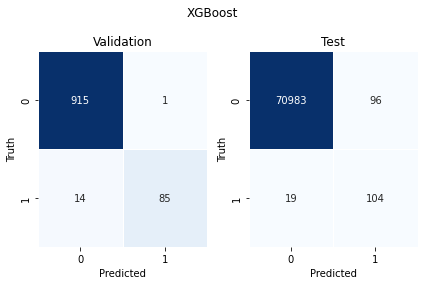

In [27]:
train_under = pd.read_pickle("data/train_under.pickle")
xgb_fit(train_under)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.63      0.78      0.70       123

    accuracy                           1.00     71202
   macro avg       0.81      0.89      0.85     71202
weighted avg       1.00      1.00      1.00     71202



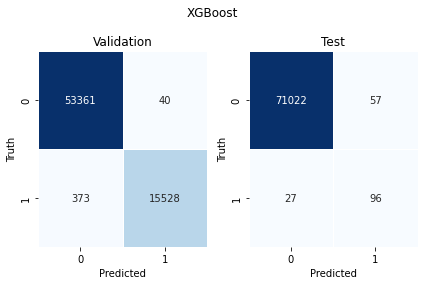

In [28]:
train_over = pd.read_pickle("data/train_over.pickle")
xgb_fit(train_over)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.42      0.84      0.56       123

    accuracy                           1.00     71202
   macro avg       0.71      0.92      0.78     71202
weighted avg       1.00      1.00      1.00     71202



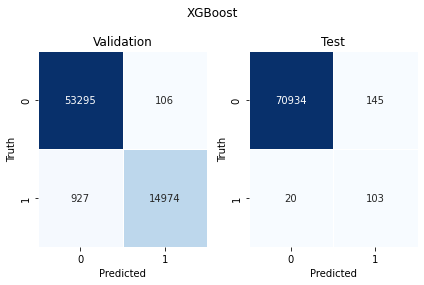

In [29]:
train_over_shrink = pd.read_pickle("data/train_over_shrink.pickle")
xgb_fit(train_over_shrink)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.46      0.80      0.59       123

    accuracy                           1.00     71202
   macro avg       0.73      0.90      0.79     71202
weighted avg       1.00      1.00      1.00     71202



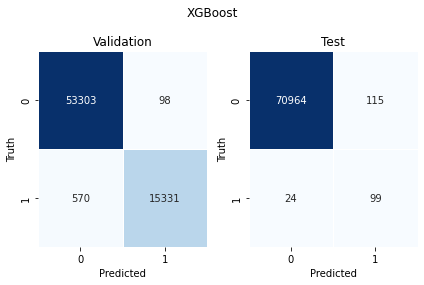

In [30]:
xgb_fit(train_smote)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.42      0.80      0.56       123

    accuracy                           1.00     71202
   macro avg       0.71      0.90      0.78     71202
weighted avg       1.00      1.00      1.00     71202



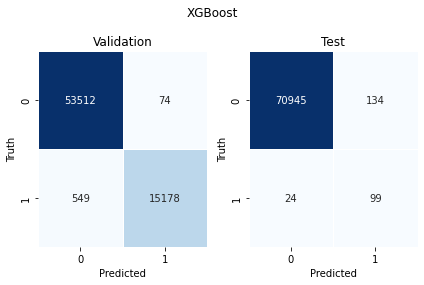

In [31]:
train_adasyn = pd.read_pickle("data/train_adasyn.pickle")
xgb_fit(train_adasyn)